# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


# Reading dataFrame

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Checking the data overview

In [439]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Checking data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Lets see the Data types of the columns

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Observation-
BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18 and OverTime are categorical data

All other columns are continious data

# Lets check the null values

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Dropping un-necessary columns

In [6]:
df.drop(["StandardHours", "EmployeeCount","EmployeeNumber"],axis=1,inplace=True)

In [7]:
df.shape

(1470, 32)

# Encoding the Attrition column 

In [8]:
df["Attrition"].replace({"Yes" : 1, "No" : 0},inplace=True)

# Checking the dataset information again

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Describing the Dataset

In [10]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observation-

We can see no null values are present. Few of them are having 0 years experience and 0 years in current role and 0 years since last promotion.
That is acceptable and natural

# Lets check the Correlation between the columns

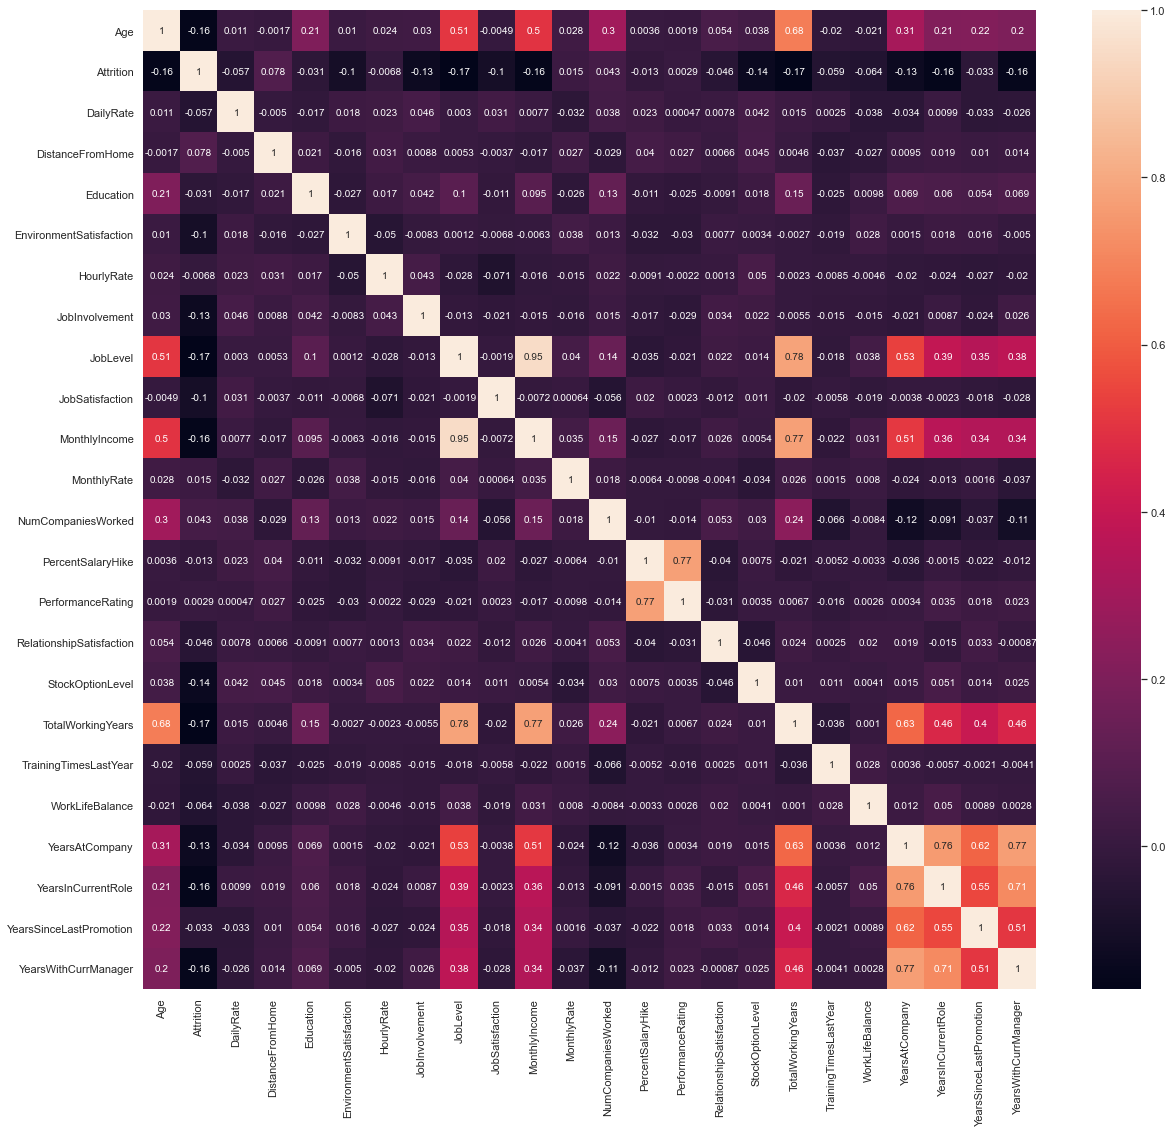

In [11]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True);

# Visualization of Data

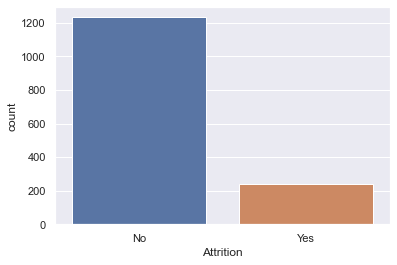

In [12]:
sns.countplot(x=df["Attrition"])
plt.xticks([0,1],["No","Yes"]);

#### Observation- As we can see Attrition count for No is more than Yes

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

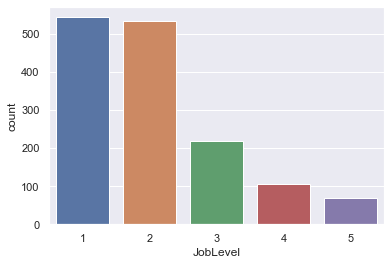

In [13]:
sns.countplot(x=df["JobLevel"])

#### Observation- JobLevel 1 has most count and JobLevel 5 has least

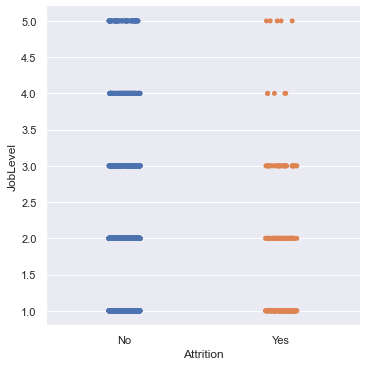

In [14]:
sns.catplot(x="Attrition",y="JobLevel",data=df)
plt.xticks([0,1],["No","Yes"])
plt.show()

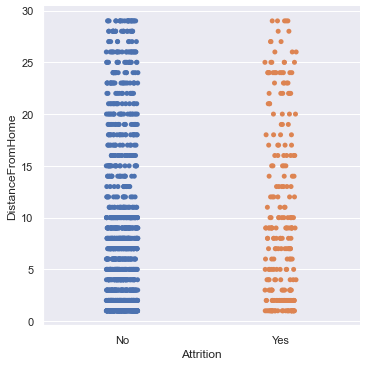

In [15]:
sns.catplot(x="Attrition",y="DistanceFromHome",data=df)
plt.xticks([0,1],["No","Yes"])
plt.show()

In [16]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

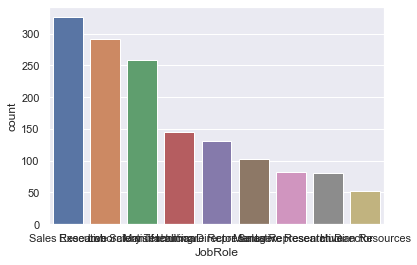

In [17]:
sns.countplot(x=df["JobRole"])

#### Observation- I can see sales executive has highest count and Human resources has least count

<AxesSubplot:xlabel='Department', ylabel='count'>

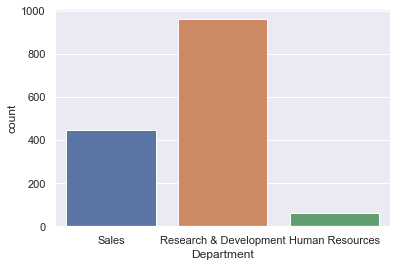

In [18]:
sns.countplot(x=df["Department"])

#### Observation- IBM have highest focus on Reasearch and Development and least focus on Human resources

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

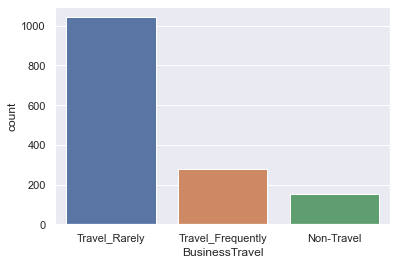

In [19]:
sns.countplot(x=df["BusinessTravel"])

#### Observation- Most of the employee travels rarely 

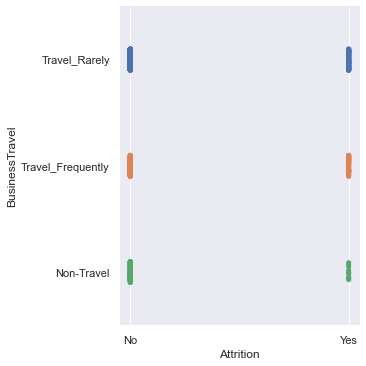

In [20]:
sns.catplot(x="Attrition",y="BusinessTravel",data=df)
plt.xticks([0,1],["No","Yes"])
plt.show()

<AxesSubplot:xlabel='EducationField', ylabel='count'>

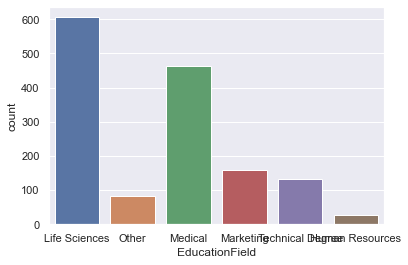

In [21]:
sns.countplot(x=df["EducationField"])

#### Observation- EducationField focus more on Life Science and Medical and Least on Human Resources

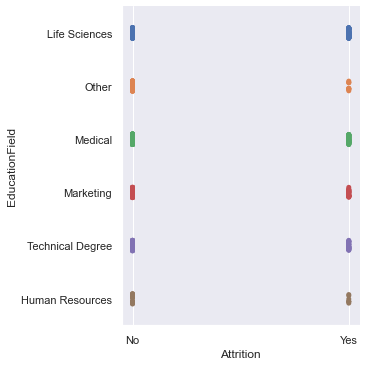

In [24]:
sns.catplot(x="Attrition",y="EducationField",data=df)
plt.xticks([0,1],["No","Yes"])
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

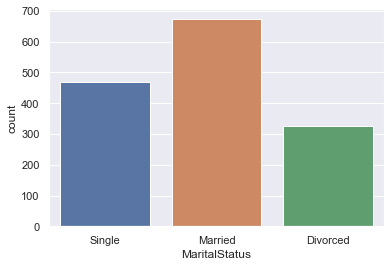

In [25]:
sns.countplot(x=df["MaritalStatus"])

#### Observation - Most of the Employees are married

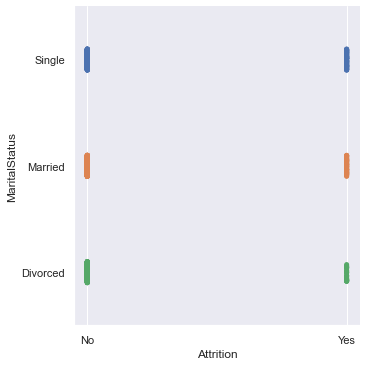

In [26]:
sns.catplot(x="Attrition",y="MaritalStatus",data=df)
plt.xticks([0,1],["No","Yes"])
plt.show()

# Continious Data

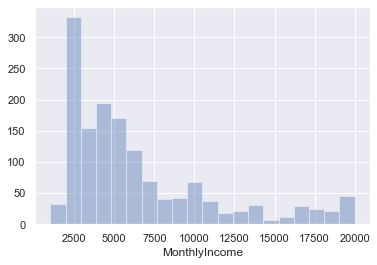

In [27]:
sns.distplot(df["MonthlyIncome"],kde=False)
plt.show()

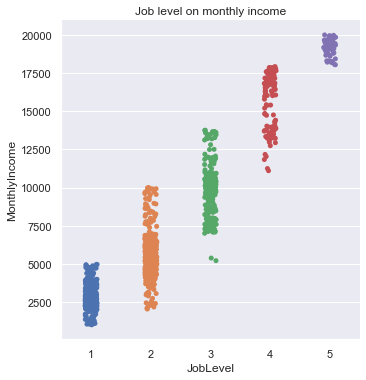

In [28]:
sns.catplot(x="JobLevel",y="MonthlyIncome",data=df)
plt.title("Job level on monthly income")
plt.show()

In [29]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

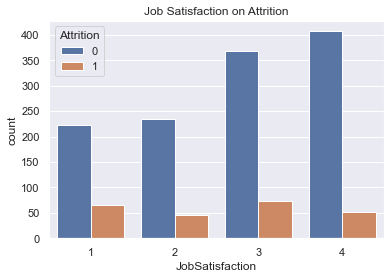

In [30]:
sns.countplot(x="JobSatisfaction",hue="Attrition",data=df)
plt.title("Job Satisfaction on Attrition")
plt.show()

#### Observation- If Job Satisfaction is more attrition is less

In [31]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

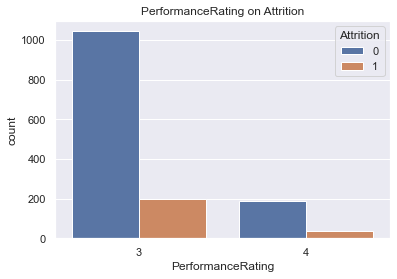

In [32]:
sns.countplot(x="PerformanceRating",hue="Attrition",data=df)
plt.title("PerformanceRating on Attrition")
plt.show()

# Scatter Plot to check the Correlation

In [33]:
y= df['Attrition']
x= df.drop(['Attrition'], axis =1)

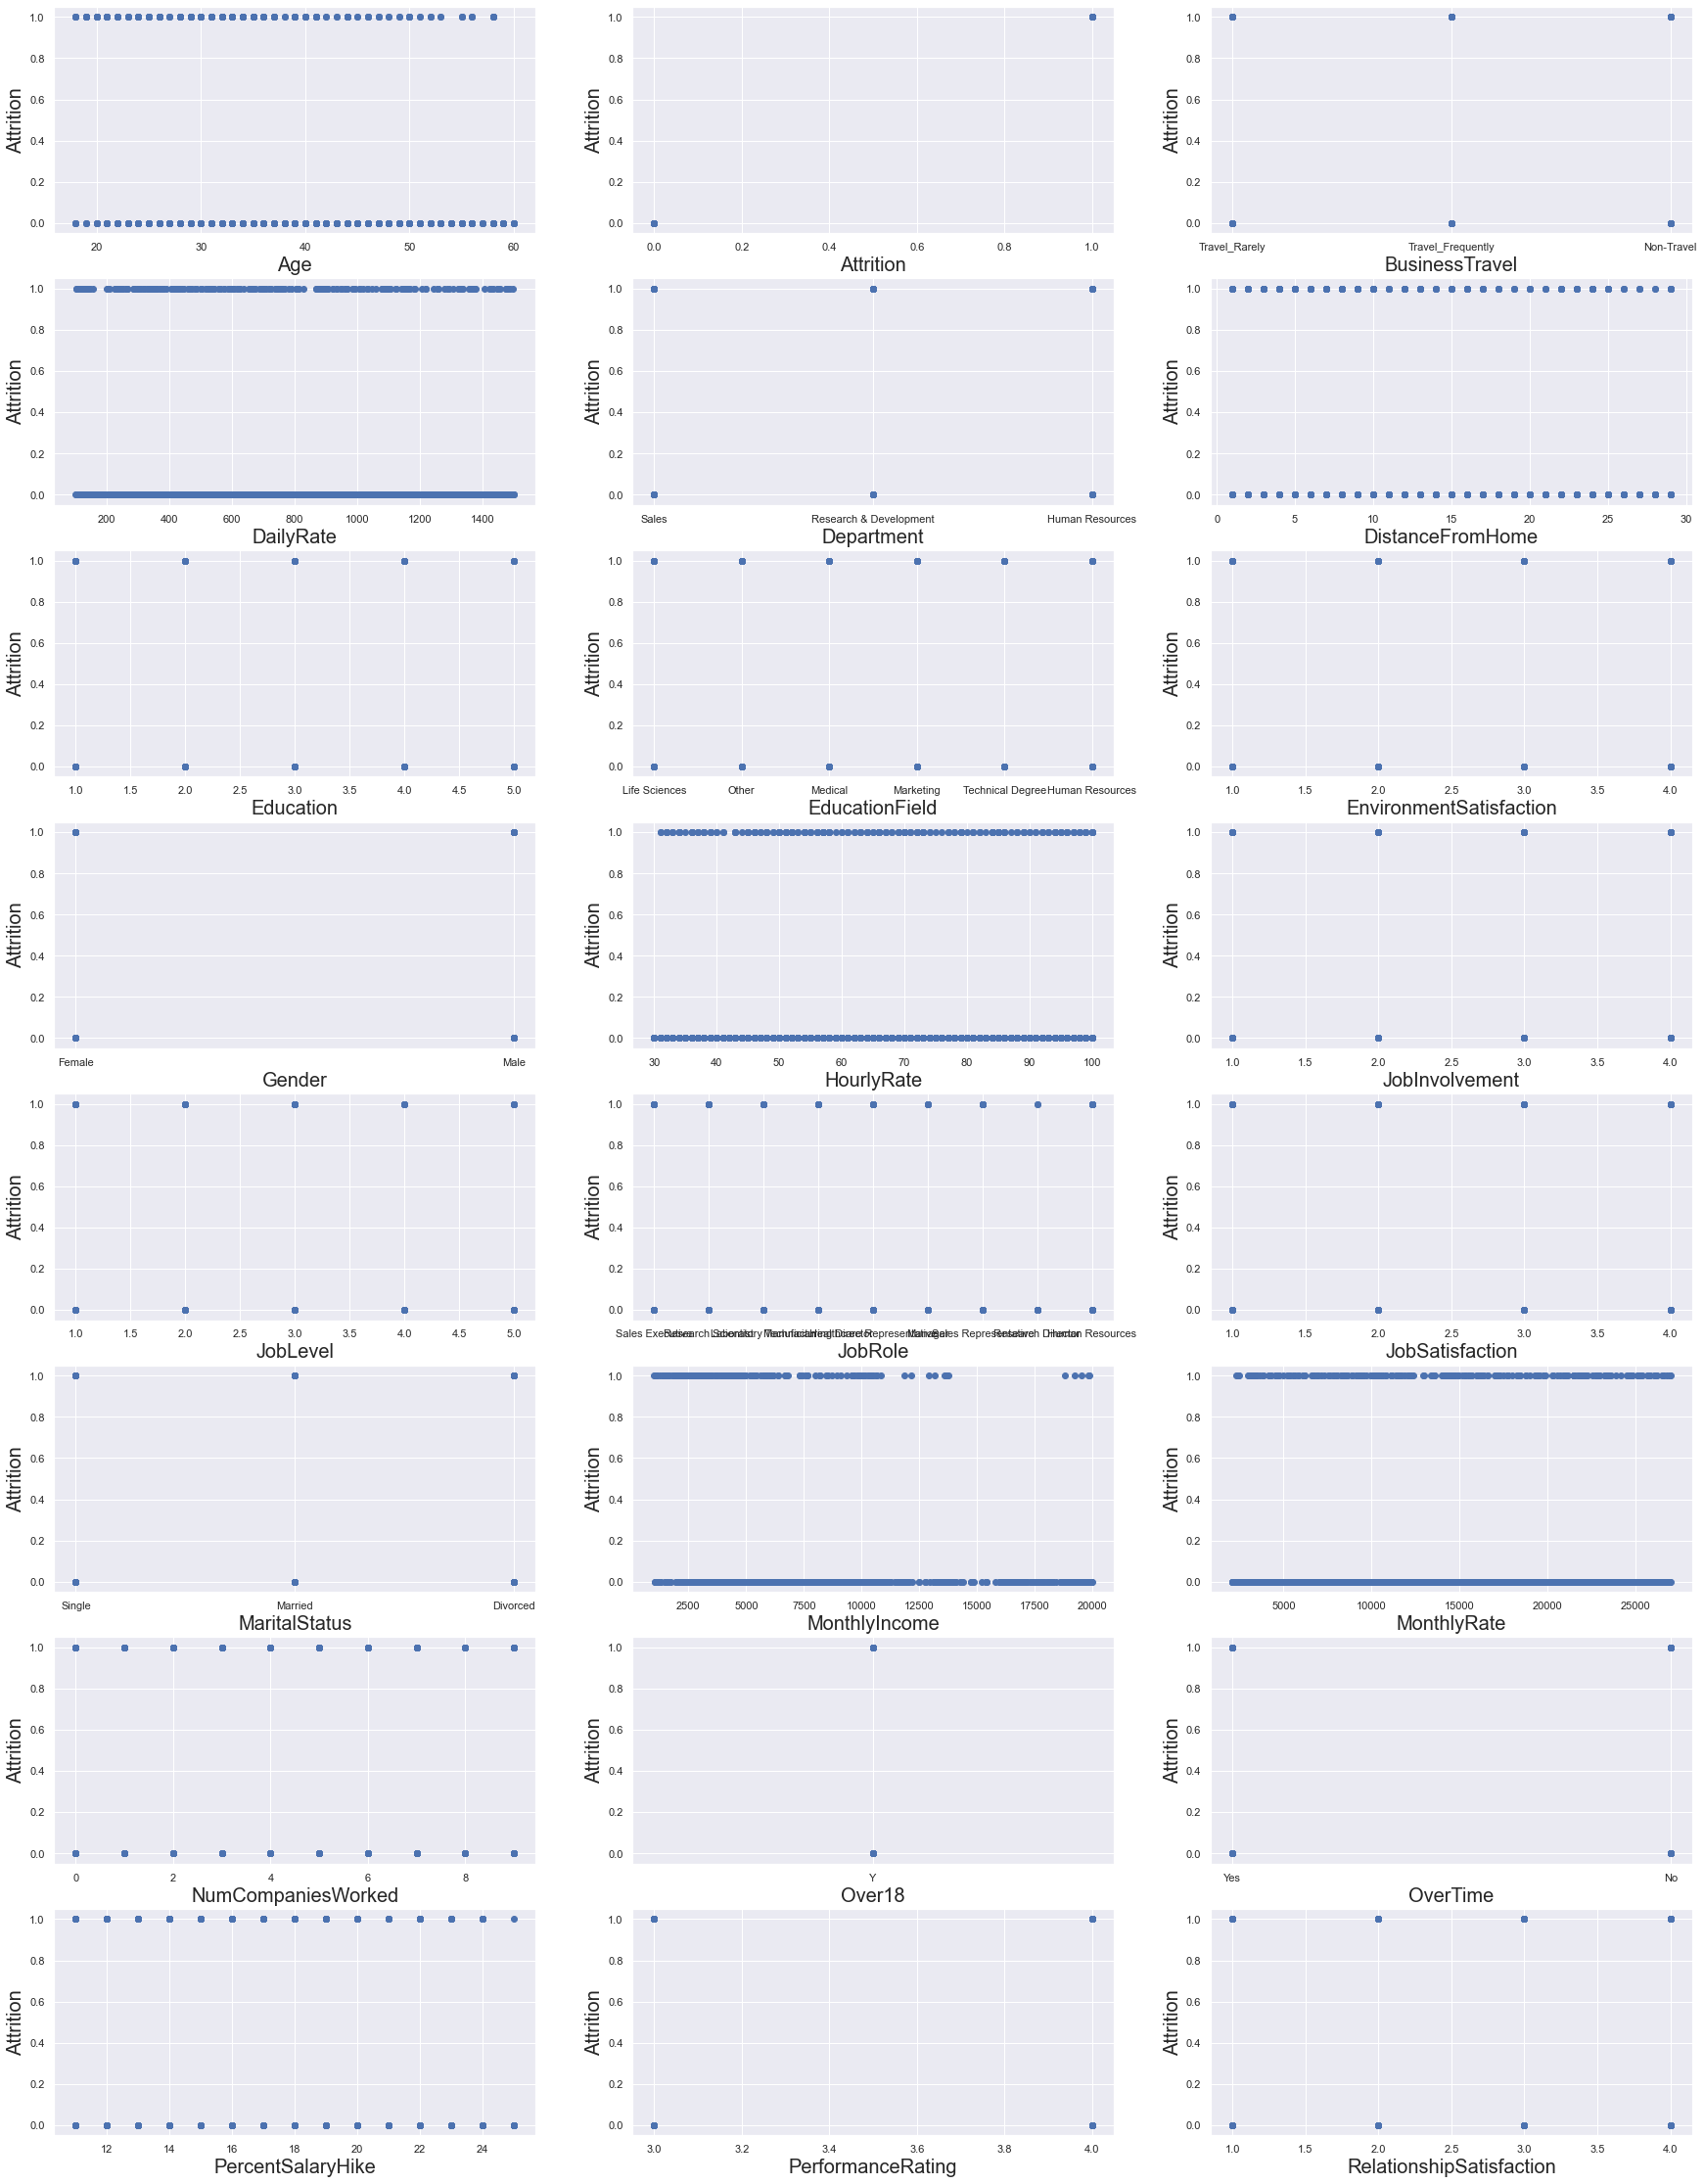

In [34]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in df:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber +=1
plt.show()

Since Over18 has single value for both Attrition, I am dropping the column

In [35]:
df=df.drop(['Over18'], axis =1)

In [36]:
df.shape

(1470, 31)

# Label Encoding 

In [37]:
numerical = list(df.select_dtypes(include=np.number).columns)
categorical = list(df.select_dtypes(include="object").columns)

In [38]:
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [39]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['BusinessTravel'] = label.fit_transform(df['BusinessTravel'])
df['Department'] = label.fit_transform(df['Department'])
df['EducationField'] = label.fit_transform(df['EducationField'])
df['Gender'] = label.fit_transform(df['Gender'])
df['JobRole'] = label.fit_transform(df['JobRole'])
df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'])
df['OverTime'] = label.fit_transform(df['OverTime'])



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

# Normal Distribution

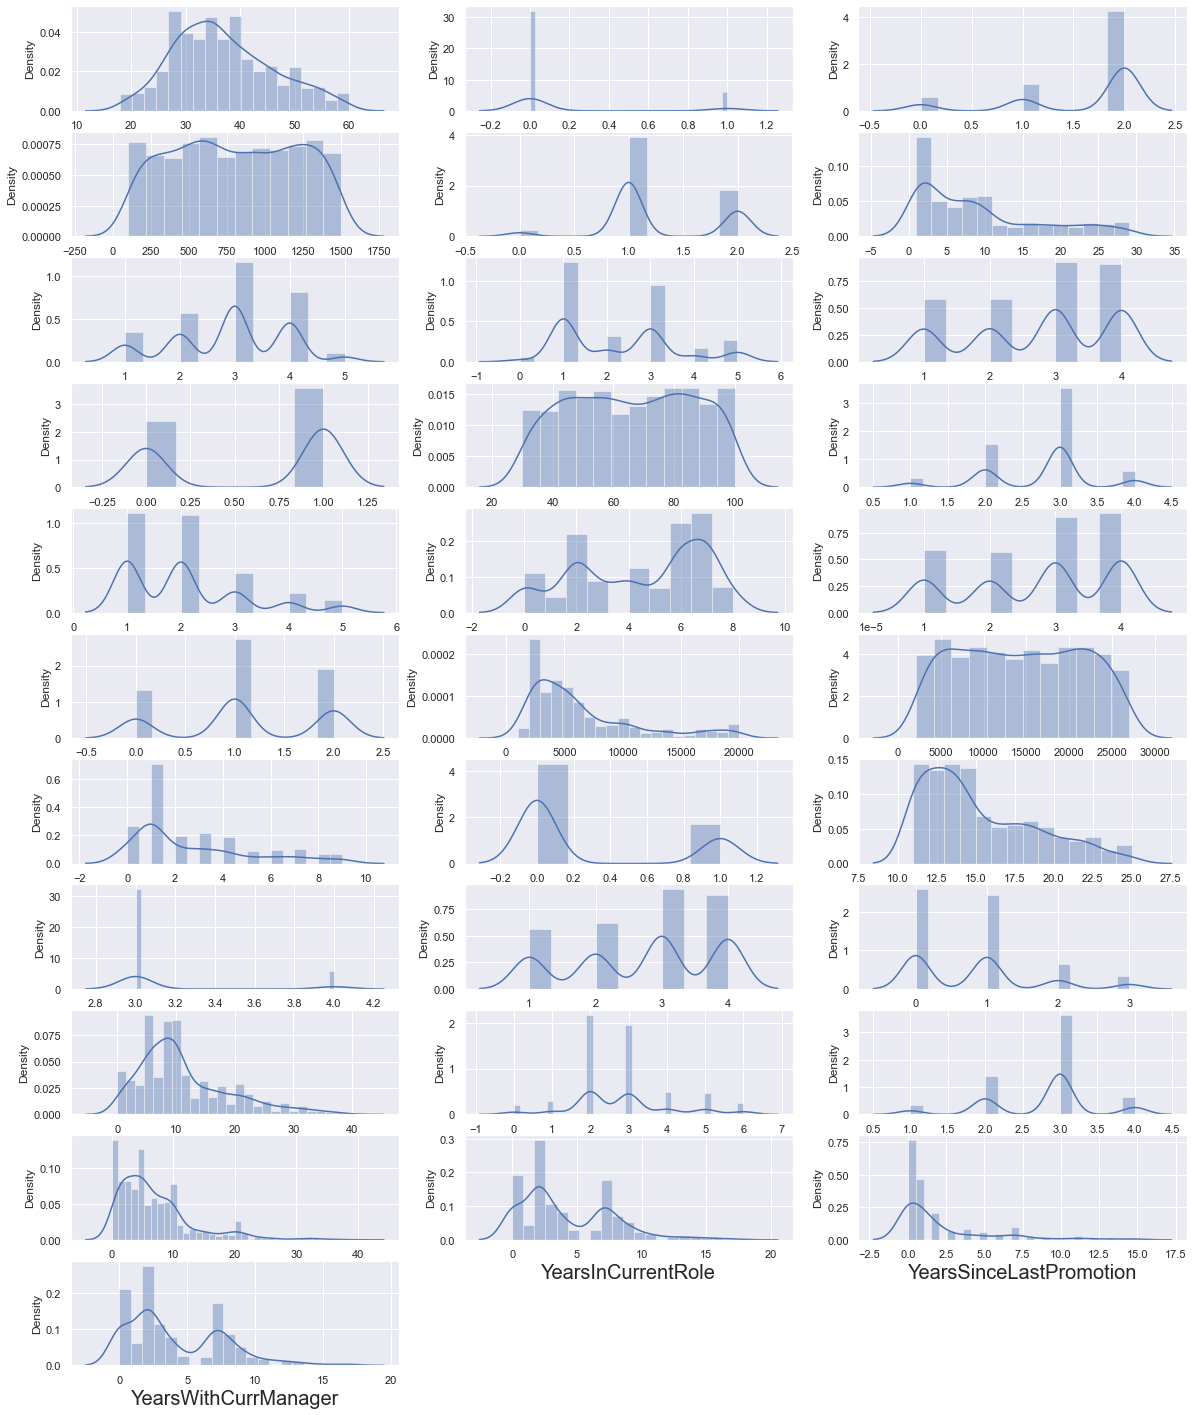

In [41]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking the Skewness

In [42]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

#### Observation-  considering skewness between +0.5 to -0.5
BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager are positively skewed.

BusinessTravel is having negatively skewed data


In [43]:
features = df.drop('Attrition', axis=1)
label = df['Attrition']

# Removing skewness-


In [44]:
df.shape

(1470, 31)

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [45]:
for col in features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [46]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

# Using Boxplot to check the outliers

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Attrition                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
BusinessTravel              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Department                  AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
EducationField                 AxesSubplot(0.125,0.593621;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Gender                      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
HourlyRate                  AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.692073,0.593621;0.0945

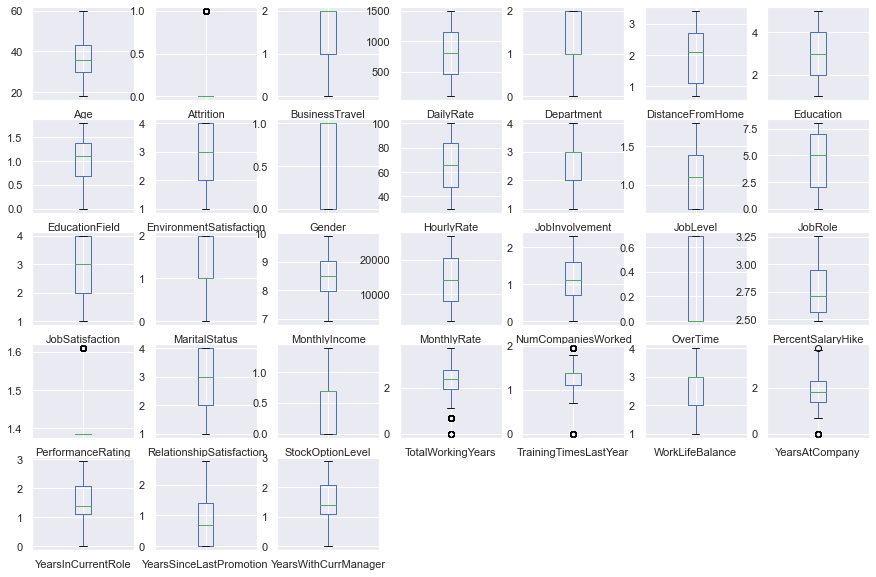

In [47]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

### Observation- Very less outliers are present so I will consider it and continue the model building

# Diving Features and Label

In [48]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

# Scaling of Data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(x)

StandardScaler()

In [52]:
X_scaled=scaler.transform(x)

In [53]:
X_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.29061127,
        -0.97334237,  0.54799589],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.88267046,
        -0.11727147,  0.90492352],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.73678265,
        -0.97334237, -1.67504313],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.352871  ,
        -0.97334237,  0.04493464],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.71446221,
        -0.97334237,  1.05105714],
       [-0.32016256,  0.59004834, -0.43256792, ...,  0.00951942,
        -0.11727147, -0.311993  ]])

# Creating Train-test split

In [54]:
x_train, x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= .25,random_state = 0)

# Model Building

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  89.13043478260869
[[304   6]
 [ 34  24]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.80      0.41      0.55        58

    accuracy                           0.89       368
   macro avg       0.85      0.70      0.74       368
weighted avg       0.88      0.89      0.88       368



## Decision Tree Classifier


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  79.61956521739131
[[278  32]
 [ 43  15]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       310
           1       0.32      0.26      0.29        58

    accuracy                           0.80       368
   macro avg       0.59      0.58      0.58       368
weighted avg       0.78      0.80      0.79       368



## Random Forest Classifier

In [57]:
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy ", accuracy_score(y_test,predrf)*100)
    print(confusion_matrix(y_test,predrf))
    print(classification_report(y_test,predrf))

Accuracy  86.68478260869566
[[307   3]
 [ 46  12]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       310
           1       0.80      0.21      0.33        58

    accuracy                           0.87       368
   macro avg       0.83      0.60      0.63       368
weighted avg       0.86      0.87      0.83       368



## SVC

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  86.95652173913044
[[306   4]
 [ 44  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       310
           1       0.78      0.24      0.37        58

    accuracy                           0.87       368
   macro avg       0.83      0.61      0.65       368
weighted avg       0.86      0.87      0.84       368



# Cross Validation

### CV for Logistic regression

In [59]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8530612244897959


### CV for Random Forest classifier

In [60]:
scr = cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random forest classifier model :", scr.mean())

Cross validation score of Random forest classifier model : 0.8578231292517007


### CV for SVC

In [61]:
scr = cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.8387755102040817


#### Logistic regression has the highest accuracy with 89% accuracy and 85% CV score
After Logistic regression Random forest is having 87% accuracy and 85% CV Score

So I will hypertune RandomForest and will check if it gives more accuracy than Logistic regression or not.


# Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [11,13,17,19,22,25,29,None],
             
             'criterion': ['gini','entropy','mse'],
                         }

In [63]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt'}

In [64]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8586956521739131

### After hypertuning Random Forest also Logistic regression has more accuracy then I am going with Logistic regression

# ROC AUC Plot

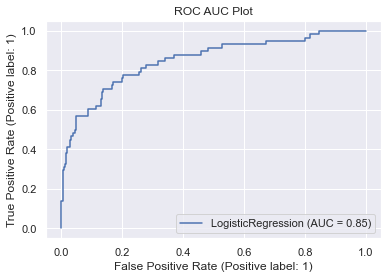

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Lr,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

### I am taking Logistic regression model as my final model.
Accuracy score is 89% and AUC is 85 %

# Conclusion

In [66]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
363,0,0
364,1,0
365,0,0
366,0,0


# Model Saving :

In [67]:
import pickle
filename = 'Hr_analytcs.pkl'
pickle.dump(Lr,open(filename, 'wb'))